# Importing Raw Data

In [142]:
import pandas as pd
import numpy as np


In [143]:
df_kiva_loans= pd.read_csv('/content/drive/MyDrive/ML/Jobs/Athena/kiva_loans.csv')
df_kiva_loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


In [144]:
df_kiva_mpi_region= pd.read_csv('/content/drive/MyDrive/ML/Jobs/Athena/kiva_mpi_region_locations.csv')
df_kiva_mpi_region.head(3)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754


In [145]:
df_loan_theme_id= pd.read_csv('/content/drive/MyDrive/ML/Jobs/Athena/loan_theme_ids.csv')
df_loan_theme_id.head(3)

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0


In [146]:
df_loan_themes_by_region= pd.read_csv('/content/drive/MyDrive/ML/Jobs/Athena/loan_themes_by_region.csv')
df_loan_themes_by_region.head(3)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0


# Combining individual data sources

In [147]:
# Combine kiva_loans with loan_theme_ids
df_merged_loans_themes = pd.merge(df_kiva_loans, df_loan_theme_id, on='id', how='left',suffixes=('_loan', '_theme'))
df_merged_loans_themes.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,Loan Theme ID,Loan Theme Type,Partner ID
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,NaN,NaN,NaN
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,a1050000000sjEC,Underserved,247.0
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,a1050000002VkWz,Underserved,334.0


In [148]:
# Combine loan_themes_by_region with kiva_mpi_region_locations
df_merged_themes_regions = pd.merge(df_kiva_mpi_region, df_loan_themes_by_region, on=['region', 'country'], how='left', suffixes=('_region', '_mpi'))
df_merged_themes_regions.head(3)

,LocationName_region,ISO_region,country,region,world_region,MPI,geo_region,lat_region,lon_region,Partner ID,...,amount,LocationName_mpi,geocode,names,geo_mpi,lat_mpi,lon_mpi,mpi_region,mpi_geo,rural_pct
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
df_final = pd.merge(df_merged_loans_themes, df_merged_themes_regions, on=['region', 'country'], how='left',suffixes=('_loans_themes', '_themes_regions'))
df_final.head(3)

,id,funded_amount,loan_amount,activity,sector_loans_themes,use,country_code,country,region,currency,...,amount,LocationName_mpi,geocode,names,geo_mpi,lat_mpi,lon_mpi,mpi_region,mpi_geo,rural_pct
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

## Summarize data

In [150]:
df_final.shape

(899006, 49)

In [151]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899006 entries, 0 to 899005
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              899006 non-null  int64  
 1   funded_amount                   899006 non-null  float64
 2   loan_amount                     899006 non-null  float64
 3   activity                        899006 non-null  object 
 4   sector_loans_themes             899006 non-null  object 
 5   use                             894771 non-null  object 
 6   country_code                    898998 non-null  object 
 7   country                         899006 non-null  object 
 8   region                          842206 non-null  object 
 9   currency                        899006 non-null  object 
 10  partner_id                      885499 non-null  float64
 11  posted_time                     899006 non-null  object 
 12  disbursed_time  

## Basic statistics for numerical features

In [152]:
df_final.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count,Partner ID_loans_themes,MPI,lat_region,lon_region,Partner ID_themes_regions,number,amount,lat_mpi,lon_mpi,rural_pct
count,8.990060e+05,899006.000000,899006.000000,885499.000000,899006.00000,899006.000000,885493.000000,278756.000000,278754.000000,278754.000000,277107.000000,277107.000000,2.771070e+05,277107.000000,277107.000000,236773.000000
mean,9.930302e+05,764.437573,818.859107,186.997248,13.97357,20.533201,187.000762,0.096556,11.054531,-2.595477,234.849625,547.948601,1.556047e+05,11.082764,-2.489685,67.268823
std,1.985173e+05,1293.153496,1360.273849,96.847130,8.77745,34.328446,96.849176,0.098629,11.337577,76.055889,136.699053,1241.225691,3.084160e+05,11.332166,76.176719,27.524144
min,6.530470e+05,0.000000,25.000000,9.000000,1.00000,0.000000,9.000000,0.000000,-28.951077,-91.530546,9.000000,1.000000,5.000000e+01,-22.906847,-91.530546,0.000000
25%,8.196312e+05,250.000000,250.000000,125.000000,8.00000,7.000000,125.000000,0.026000,6.067333,-86.363020,106.000000,3.000000,7.375000e+03,6.067333,-86.363020,57.000000
50%,9.897345e+05,450.000000,500.000000,160.000000,14.00000,13.000000,160.000000,0.062000,11.970448,7.416505,199.000000,32.000000,3.500000e+04,11.970448,7.416505,80.000000
75%,1.167991e+06,875.000000,975.000000,241.000000,14.00000,24.000000,241.000000,0.121000,13.479292,68.787038,295.000000,180.000000,1.207000e+05,13.479292,68.787038,87.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.00000,2986.000000,536.000000,0.522000,47.886399,126.455373,542.000000,6722.000000,1.884700e+06,47.886399,126.455373,100.000000


## Identify missing values

In [153]:
df_final.isnull().sum()

id                                     0
funded_amount                          0
loan_amount                            0
activity                               0
sector_loans_themes                    0
use                                 4235
country_code                           8
country                                0
region                             56800
currency                               0
partner_id                         13507
posted_time                            0
disbursed_time                      2396
funded_time                        66792
term_in_months                         0
lender_count                           0
tags                              223833
borrower_genders                    4221
repayment_interval                     0
date                                   0
Loan Theme ID_loans_themes         13513
Loan Theme Type_loans_themes       13513
Partner ID_loans_themes            13513
LocationName_region               620250
ISO_region      

In [154]:
# df_final['funded_time']

## Identify Duplicate values

In [155]:
df_final.duplicated().sum()

0

## Data Cleaning and Preprocessing

In [156]:
# Fill missing MPI values with median
df_final['MPI'].fillna(df_final['MPI'].median(), inplace=True)

In [157]:
df_final['sector_themes_regions'].fillna('Unknown', inplace=True)
df_final['country'].fillna('Unknown', inplace=True)


In [158]:
df_final['posted_time'] = pd.to_datetime(df_final['posted_time'])
df_final['funded_time'] = pd.to_datetime(df_final['funded_time'])

In [159]:
df_final['posted_year'] = df_final['posted_time'].dt.year
df_final['posted_month'] = df_final['posted_time'].dt.month

## Correlation between features

In [160]:
df_final_numeric = df_final.select_dtypes(include=[np.number])

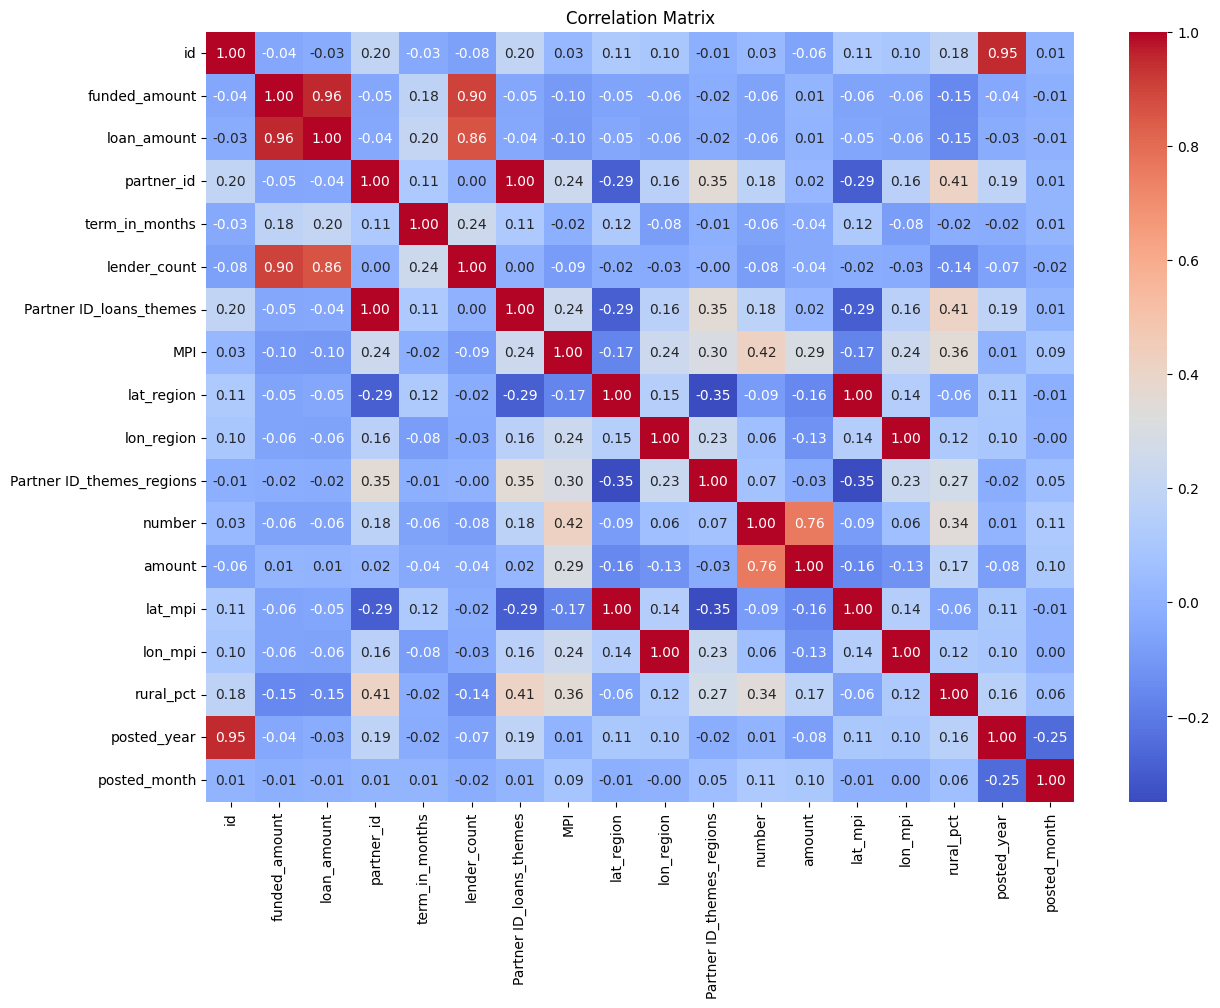

In [161]:
# df_final_numeric.corr()

plt.figure(figsize=(14, 10))
correlation_matrix = df_final_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



## Distribution of Loan Amounts


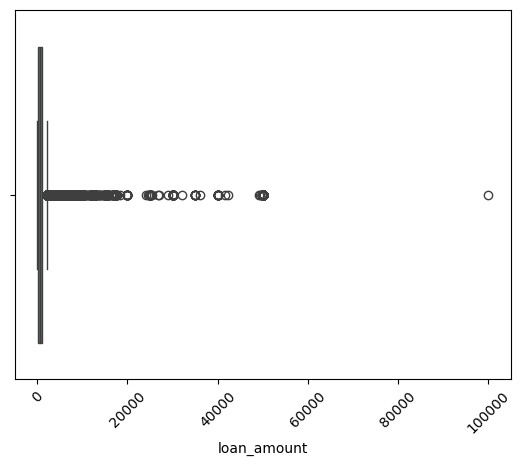

In [162]:
sns.boxplot(x=df_final['loan_amount'])
plt.xticks(rotation=45)

plt.show()

### Removing loan amount outliers

In [163]:
df_final_outlier_remv= df_final[df_final['loan_amount']<2000]

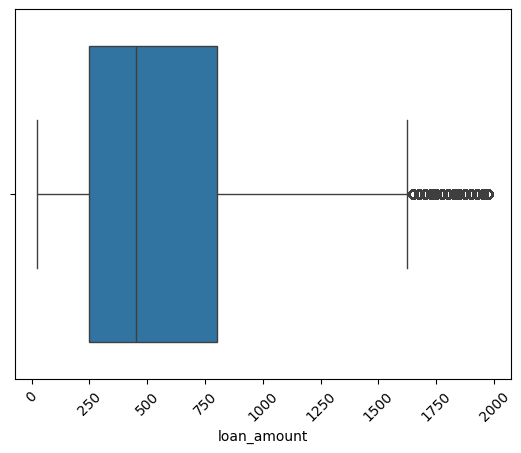

In [164]:
sns.boxplot(x=df_final_outlier_remv['loan_amount'])
plt.xticks(rotation=45)

plt.show()

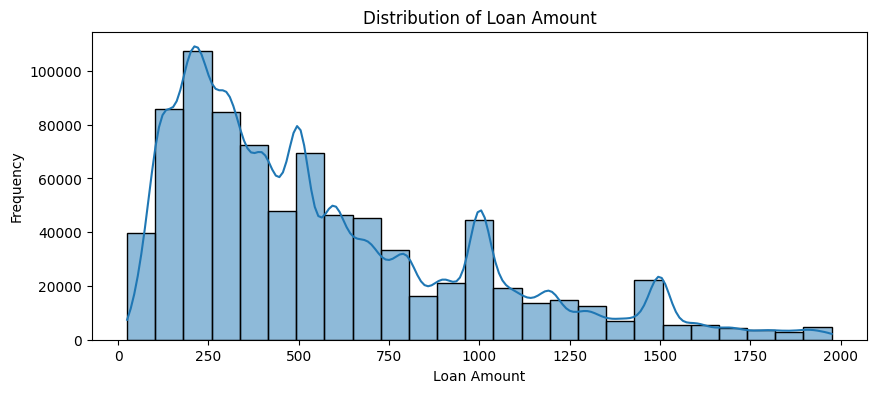

In [165]:
plt.figure(figsize=(10, 4))
sns.histplot(df_final_outlier_remv['loan_amount'], bins=25, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


## Sector wise distribution of Loan amount

In [188]:
df_group1= df_final_outlier_remv.groupby('sector_loans_themes').agg({'id':'nunique'})
df_group1

,id
sector_loans_themes,
Agriculture,167894
Arts,10424
Clothing,27940
Construction,5561
Education,27727
Entertainment,608
Food,122399
Health,8086
Housing,32167


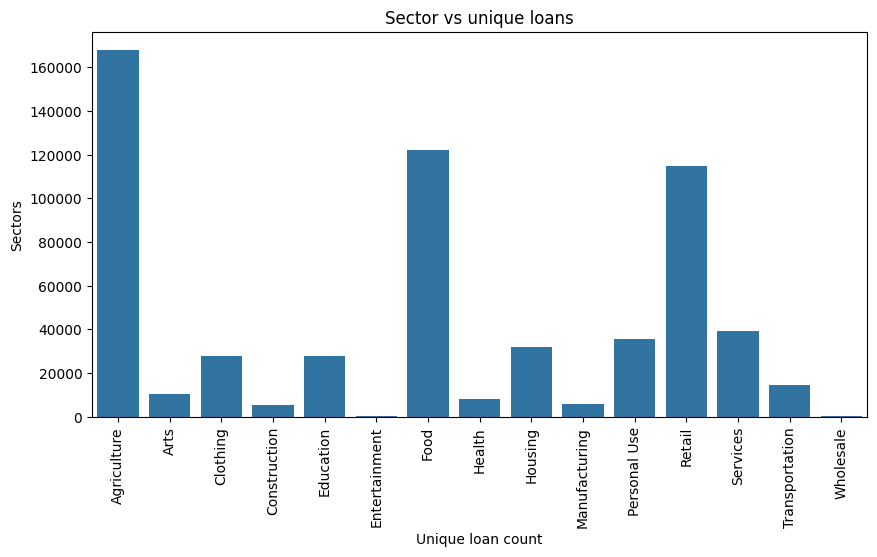

In [167]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df_group1.index, y= df_group1['id'])
plt.title('Sector vs unique loans')
plt.xlabel('Unique loan count')
plt.ylabel('Sectors')

plt.xticks(rotation=90)
plt.show()

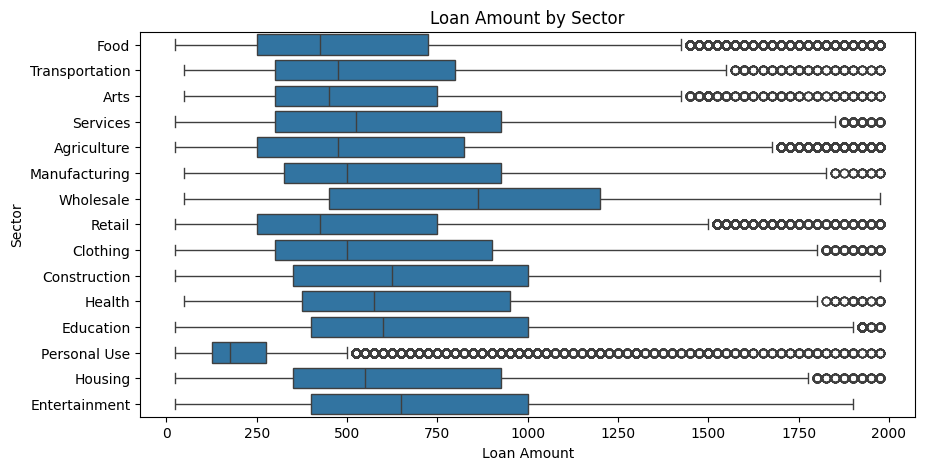

In [168]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='loan_amount', y='sector_loans_themes', data=df_final_outlier_remv)
plt.title('Loan Amount by Sector')
plt.xlabel('Loan Amount')
plt.ylabel('Sector')
plt.show()


## Top 10 Loan Themes by count of unique loans

In [169]:
df_group2= df_final_outlier_remv.groupby('Loan Theme Type_loans_themes').agg({'id':'nunique'}).reset_index().sort_values('id',ascending=False)
df_group2= df_group2.head(10)
df_group2

,Loan Theme Type_loans_themes,id
55,General,313710
147,Underserved,49086
3,Agriculture,30888
115,Rural Inclusion,16677
167,Water,16053
66,Higher Education,13805
56,General (Women),12642
154,Vulnerable Populations,10871
60,Green,10792
168,Water and Sanitation,8598


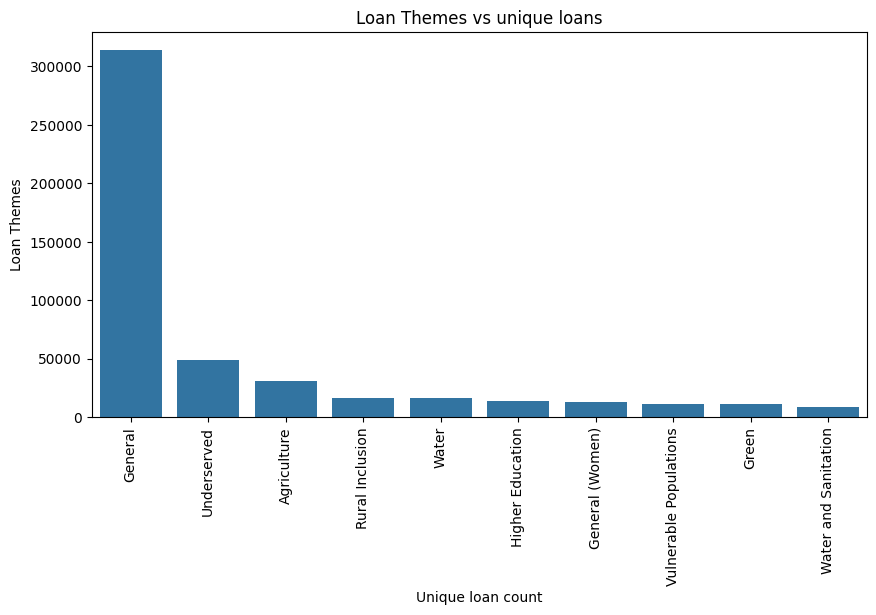

In [170]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df_group2['Loan Theme Type_loans_themes'], y= df_group2['id'])
plt.title('Loan Themes vs unique loans')
plt.xlabel('Unique loan count')
plt.ylabel('Loan Themes')

plt.xticks(rotation=90)
plt.show()

Top 10 borrowing countries in terms of Total Loan amount

In [189]:
total_loan_by_country= df_final_outlier_remv[['id','loan_amount','country']].drop_duplicates(keep='first')

In [190]:
# Calculate total loan amount by country
total_loan_by_country = total_loan_by_country.groupby('country')['loan_amount'].sum().reset_index().sort_values('loan_amount',ascending=False)

df_group3= total_loan_by_country.head(10)
df_group3


,country,loan_amount
52,Philippines,54975825.0
29,Kenya,31599775.0
18,El Salvador,26585350.0
9,Cambodia,17486325.0
51,Peru,14690625.0
12,Colombia,13197350.0
71,Uganda,12858800.0
64,Tajikistan,12697850.0
16,Ecuador,12609400.0
47,Pakistan,12501825.0


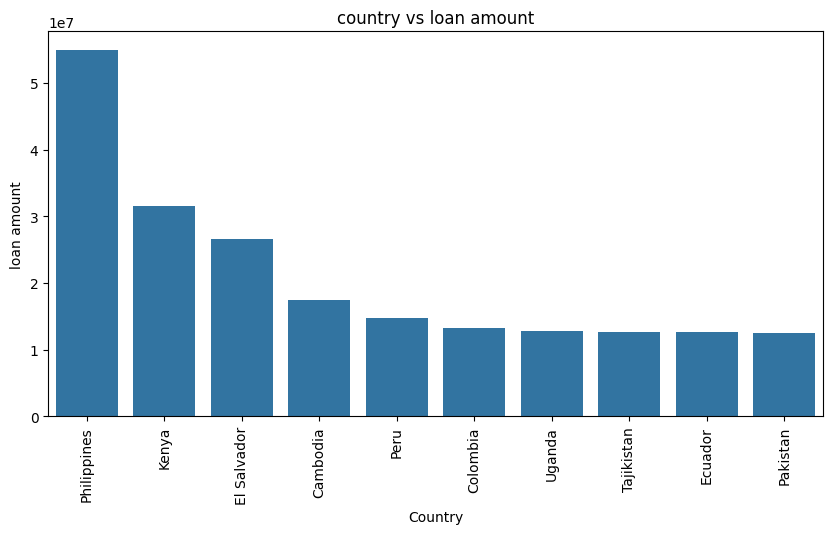

In [191]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df_group3['country'], y= df_group3['loan_amount'])
plt.title('country vs loan amount')
plt.xlabel('Country')
plt.ylabel('loan amount')

plt.xticks(rotation=90)
plt.show()

## Loan borrower gender analysis

In [173]:
df_final_outlier_remv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830489 entries, 0 to 899005
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype              
---  ------                          --------------   -----              
 0   id                              830489 non-null  int64              
 1   funded_amount                   830489 non-null  float64            
 2   loan_amount                     830489 non-null  float64            
 3   activity                        830489 non-null  object             
 4   sector_loans_themes             830489 non-null  object             
 5   use                             826858 non-null  object             
 6   country_code                    830489 non-null  object             
 7   country                         830489 non-null  object             
 8   region                          784407 non-null  object             
 9   currency                        830489 non-null  object             
 10  p

In [192]:
df_group4= df_final_outlier_remv[['id','loan_amount','borrower_genders']].drop_duplicates(keep='first')

In [193]:
df_group4= df_group4.groupby('borrower_genders').agg({'loan_amount':'sum'}).reset_index().sort_values('loan_amount',ascending=False)
df_group4= df_group4.head(10)
df_group4
# borrower_gender_distribution = df_final_outlier_remv['borrower_genders'].value_counts().reset_index()


,borrower_genders,loan_amount
0,female,207346850.0
3725,male,83779150.0
2,"female, female, female",8515975.0
3,"female, female, female, female",6601925.0
1,"female, female",6481450.0
4,"female, female, female, female, female",4957725.0
5,"female, female, female, female, female, female",1679175.0
9,"female, female, female, female, female, female...",1409200.0
6,"female, female, female, female, female, female...",1032900.0
7,"female, female, female, female, female, female...",694350.0


## Loan amount Distribution by Repayment Interval


In [194]:
df_group5= df_final_outlier_remv[['id','loan_amount','repayment_interval']].drop_duplicates(keep='first')

In [195]:
df_group5= df_group5.groupby('repayment_interval').agg({'loan_amount':'sum'}).reset_index().sort_values('loan_amount',ascending=False)
df_group5= df_group5.head(10)
df_group5

# df_group5 = df_final_outlier_remv['repayment_interval'].value_counts().reset_index()


,repayment_interval,loan_amount
2,monthly,205294250.0
1,irregular,104147850.0
0,bullet,39477475.0
3,weekly,141275.0


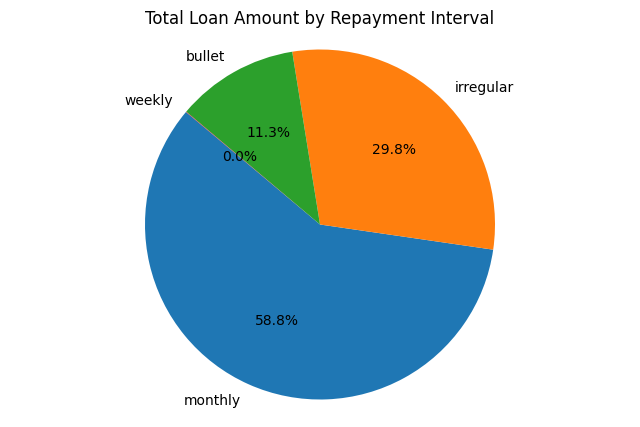

In [196]:
plt.figure(figsize=(8,5))
plt.pie(df_group5['loan_amount'], labels=df_group5['repayment_interval'], autopct="%1.1f%%", startangle=140)
plt.title('Total Loan Amount by Repayment Interval')
plt.axis('equal')
plt.show()

## Funding TAT (Turn Around Time)

In [177]:
df_final_outlier_remv['posted_time'] = pd.to_datetime(df_final_outlier_remv['posted_time'])
df_final_outlier_remv['funded_time'] = pd.to_datetime(df_final_outlier_remv['funded_time'])

<ipython-input-177-223f30950bdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_outlier_remv['posted_time'] = pd.to_datetime(df_final_outlier_remv['posted_time'])
<ipython-input-177-223f30950bdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_outlier_remv['funded_time'] = pd.to_datetime(df_final_outlier_remv['funded_time'])


In [178]:
df_final_outlier_remv['funding_TAT']= (df_final_outlier_remv['funded_time'] - df_final_outlier_remv['posted_time']).dt.total_seconds()/ ( 3600 )


<ipython-input-178-2918b969d21c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_outlier_remv['funding_TAT']= (df_final_outlier_remv['funded_time'] - df_final_outlier_remv['posted_time']).dt.total_seconds()/ ( 3600 )


In [206]:
df_final_outlier_remv['funding_TAT'].describe()

count    773907.000000
mean        339.531760
std         328.675850
min           0.033333
25%         118.316806
50%         222.324444
75%         520.815278
max       10093.758333
Name: funding_TAT, dtype: float64

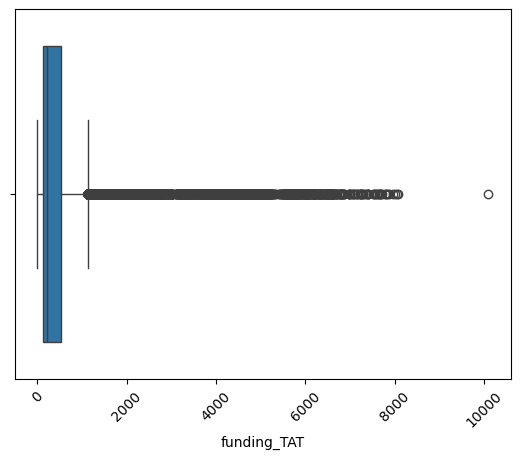

In [202]:
sns.boxplot(x=df_final_outlier_remv['funding_TAT'])
plt.xticks(rotation=45)

plt.show()

In [203]:
df_final_outlier_remv5= df_final_outlier_remv[df_final_outlier_remv['funding_TAT']<1200]

In [204]:
df_group_a= df_final_outlier_remv5[['id','funding_TAT']].drop_duplicates(keep='first')

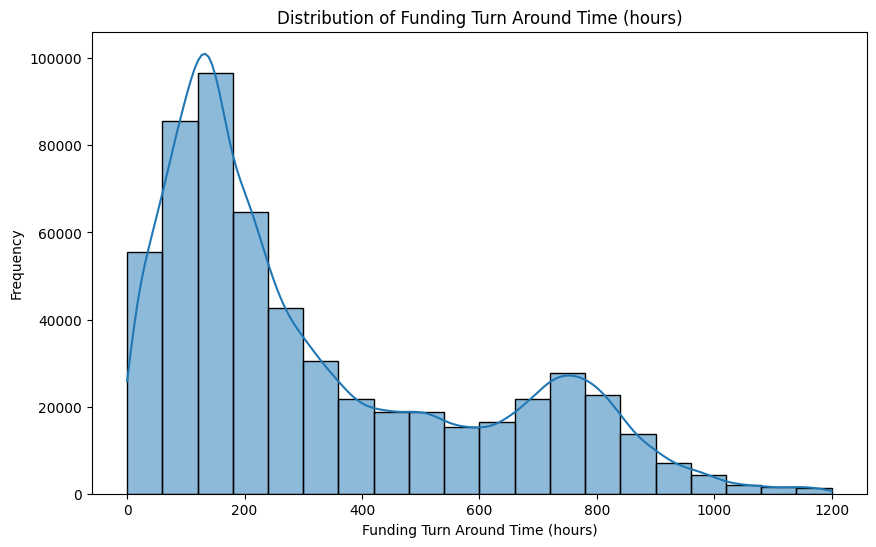

In [205]:
plt.figure(figsize=(10, 6))
sns.histplot(df_group_a['funding_TAT'], bins=20, kde=True)
plt.title('Distribution of Funding Turn Around Time (hours)')
plt.xlabel('Funding Turn Around Time (hours)')
plt.ylabel('Frequency')
plt.show()


## Proportion of Funding that gets utilized for Loan distribution

In [199]:
df_group_b= df_final_outlier_remv[['id','funded_amount','loan_amount']].drop_duplicates(keep='first')

In [200]:
df_group_b['funded_amount'].sum() / df_group_b['loan_amount'].sum()

0.9460084108544399

## Relation between Loan Amount vs MPI

In [181]:
df_group6= df_final_outlier_remv[['id','loan_amount','MPI']].drop_duplicates(keep='first')
df_group6 = df_group6.groupby(['id']).agg({'loan_amount':'sum','MPI':'mean'}).reset_index()
df_group6

,id,loan_amount,MPI
0,653048,625.0,0.062
1,653049,250.0,0.062
2,653050,575.0,0.062
3,653051,300.0,0.062
4,653052,875.0,0.062
...,...,...,...
613345,1340332,25.0,0.062
613346,1340333,125.0,0.062
613347,1340334,25.0,0.062
613348,1340338,25.0,0.062


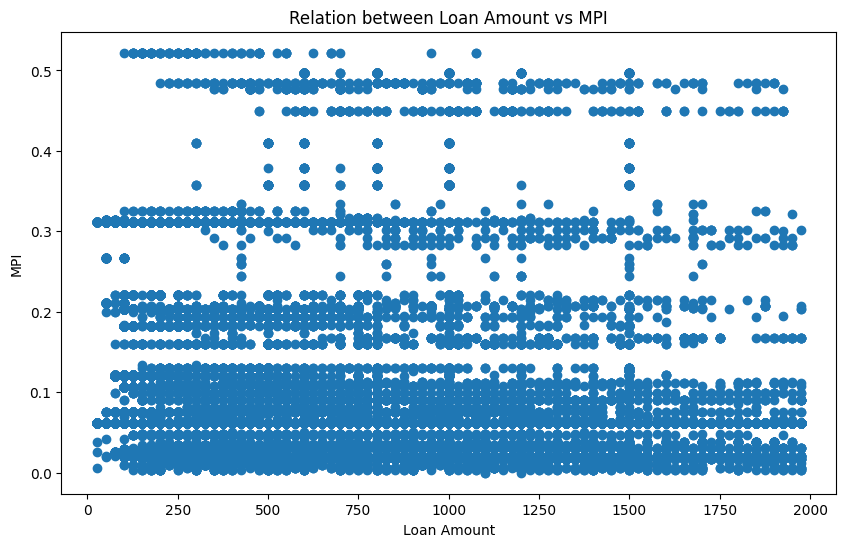

In [182]:
plt.figure(figsize=(10,6))
plt.scatter(df_group6['loan_amount'], df_group6['MPI'])

plt.title('Relation between Loan Amount vs MPI')
plt.xlabel('Loan Amount')
plt.ylabel('MPI')

plt.show()

## Distribution of Loans in terms loan term (period)

In [183]:
df_group7= df_final_outlier_remv[['id','term_in_months']].drop_duplicates(keep='first')


df_group7 = df_group7['term_in_months'].value_counts().reset_index().rename(columns={'count':'unique_loans'})
df_group7

,term_in_months,unique_loans
0,14.0,160831
1,8.0,133466
2,11.0,39461
3,7.0,30341
4,13.0,29658
...,...,...
102,89.0,1
103,134.0,1
104,96.0,1
105,95.0,1


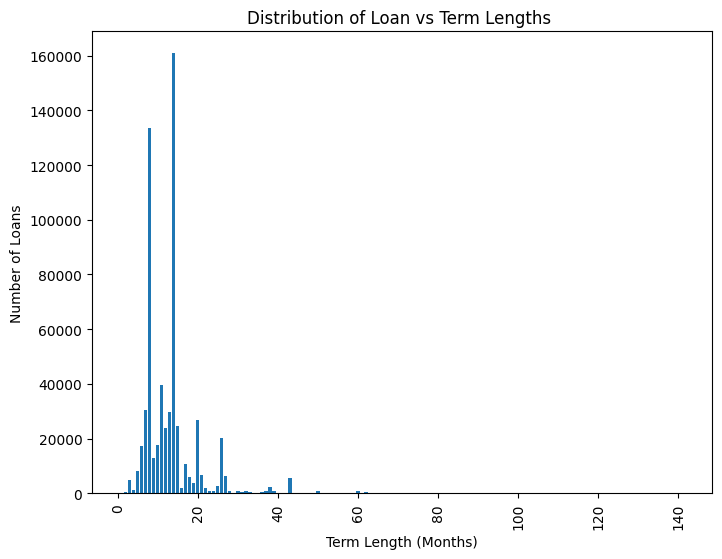

In [185]:
plt.figure(figsize=(8, 6))
plt.bar(df_group7['term_in_months'], df_group7['unique_loans'])
plt.xlabel('Term Length (Months)')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loan vs Term Lengths ')
plt.xticks(rotation=90)

plt.show()